We've learned a lot so far, but there is still a problem: do we *actually* want to completely remove this data? This is where Principal Component Analysis comes in.

PCA helps us find the axes best that separate our data.

Suppose you are looking at some attributes, but they're not really helpful by themselves.
Via PCA, we can find components that maximize the variance and minimize the error (i.e the distance of data points to the direction of the axis) of this data.  

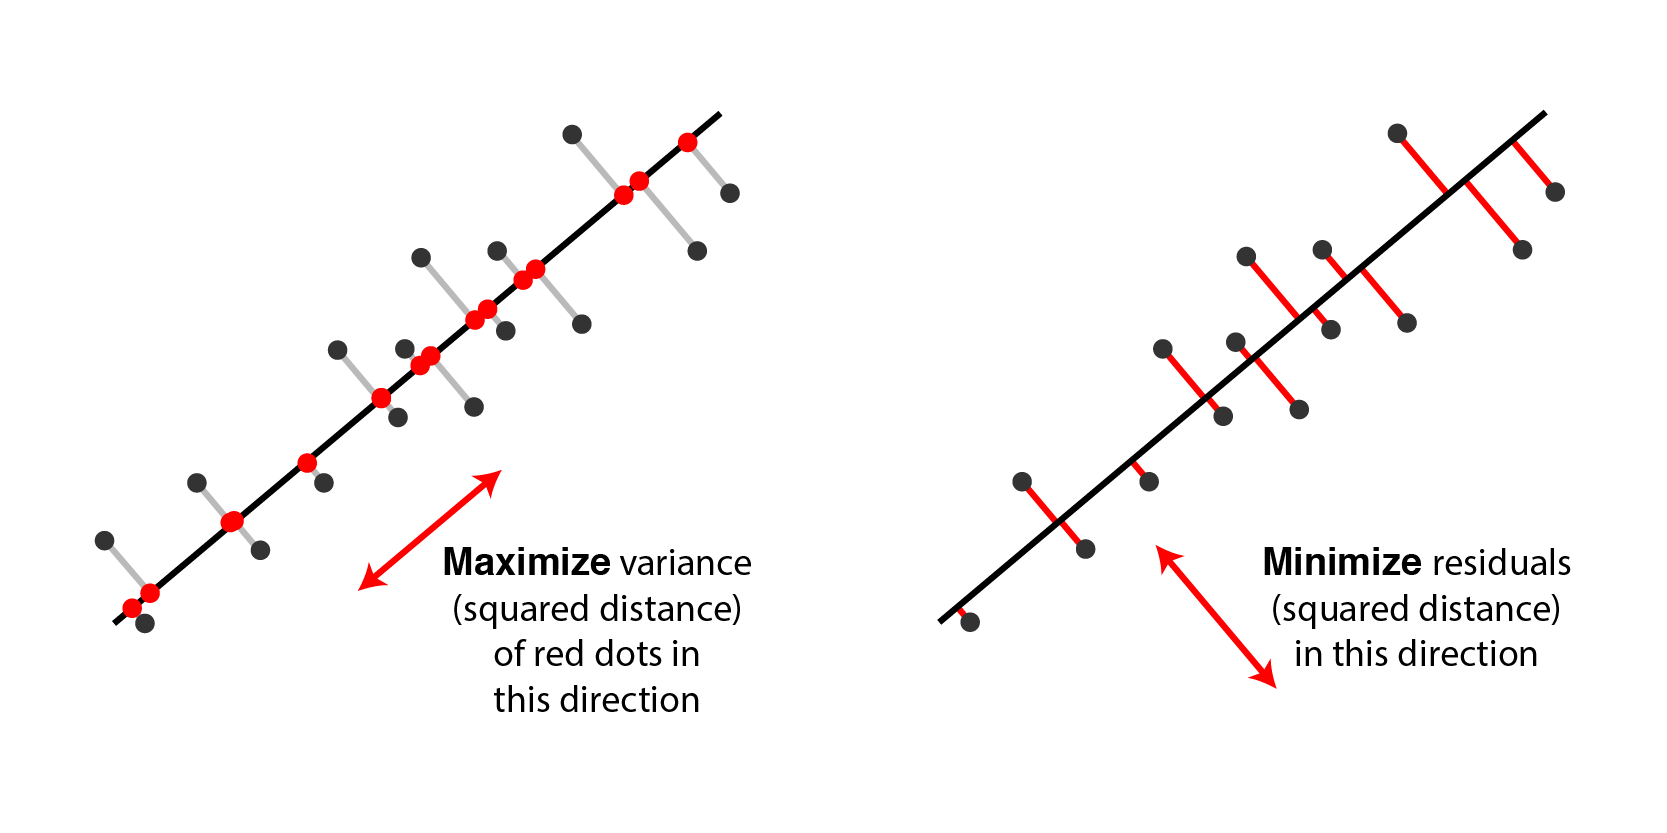

# Extraction

In [2]:
library(ggplot2)
library(dplyr)

# 0. Same approach to the csv as in the previous episode:
header <- read.csv("echonest.csv", header = FALSE, nrows = 4)
echonest <- read.csv("echonest.csv", skip = 4, header = FALSE)
combined_header <- apply(header, 2, function(col) paste(col, collapse = "_"))
unique_combined_header <- make.unique(combined_header)
colnames(echonest) <- unique_combined_header
colnames(echonest)[1] <- "track_id"

track_genres <- read.csv("track_genres.csv")
echonest <- left_join(echonest, track_genres, by = "track_id")

# Transformation

Scroll down in the summary to see the cumulative proportion of variance reach 99% at some PC. For dimensionality reduction, cutting off at this point is common practice.

In [3]:
# Don't forget to standardise your data
numeric_columns <- echonest[, sapply(echonest, is.numeric)]
echonest_with_genres <- echonest %>%
  select(track_id, genre_parent, everything()) # Ensure track_id and genre_parent are included

scaled_numeric <- scale(numeric_columns)
echonest.std <- as.data.frame(scaled_numeric)

# Ensure rows with missing values are omitted before PCA
complete_data <- echonest_with_genres[complete.cases(echonest.std), ]

# 2. Apply PCA
pca <- prcomp(echonest.std[complete.cases(echonest.std), ], scale = TRUE)

summary(pca)

Importance of components:
                         PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     5.489 4.36334 3.36650 2.86597 2.60869 2.52429 2.42931
Proportion of Variance 0.123 0.07771 0.04626 0.03353 0.02778 0.02601 0.02409
Cumulative Proportion  0.123 0.20066 0.24692 0.28045 0.30823 0.33423 0.35832
                          PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     2.3372 2.29733 2.24948 2.22382 2.17262 2.07230 2.06042
Proportion of Variance 0.0223 0.02154 0.02065 0.02019 0.01927 0.01753 0.01733
Cumulative Proportion  0.3806 0.40216 0.42281 0.44300 0.46226 0.47979 0.49712
                         PC15    PC16    PC17    PC18    PC19   PC20    PC21
Standard deviation     2.0105 1.96523 1.93956 1.91511 1.76888 1.7359 1.69391
Proportion of Variance 0.0165 0.01576 0.01535 0.01497 0.01277 0.0123 0.01171
Cumulative Proportion  0.5136 0.52938 0.54474 0.55971 0.57248 0.5848 0.59649
                          PC22   PC23    PC24 

# Visualization

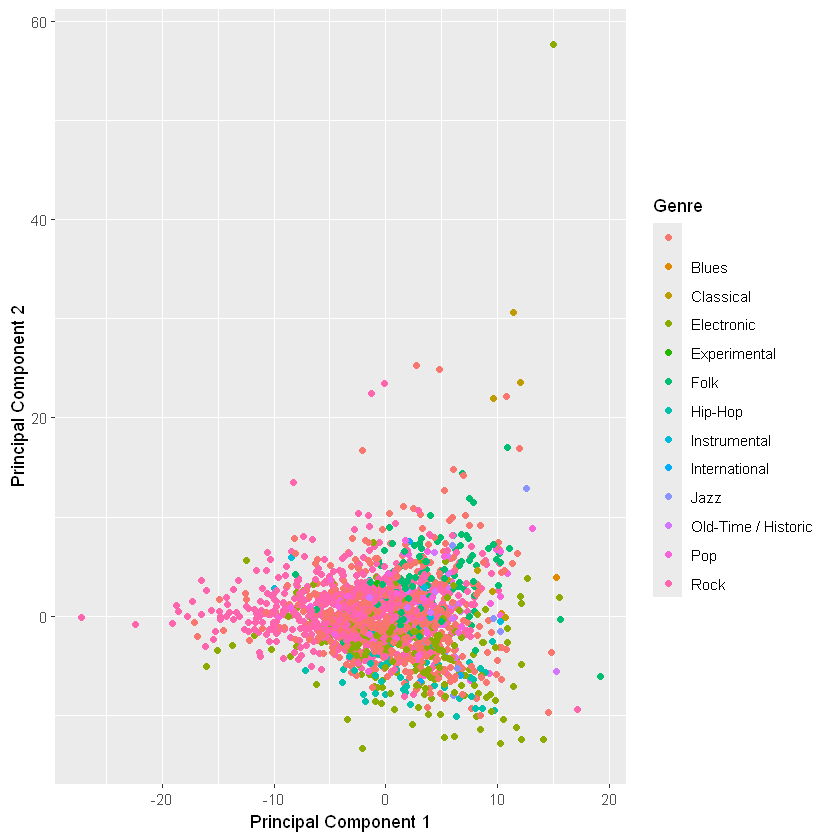

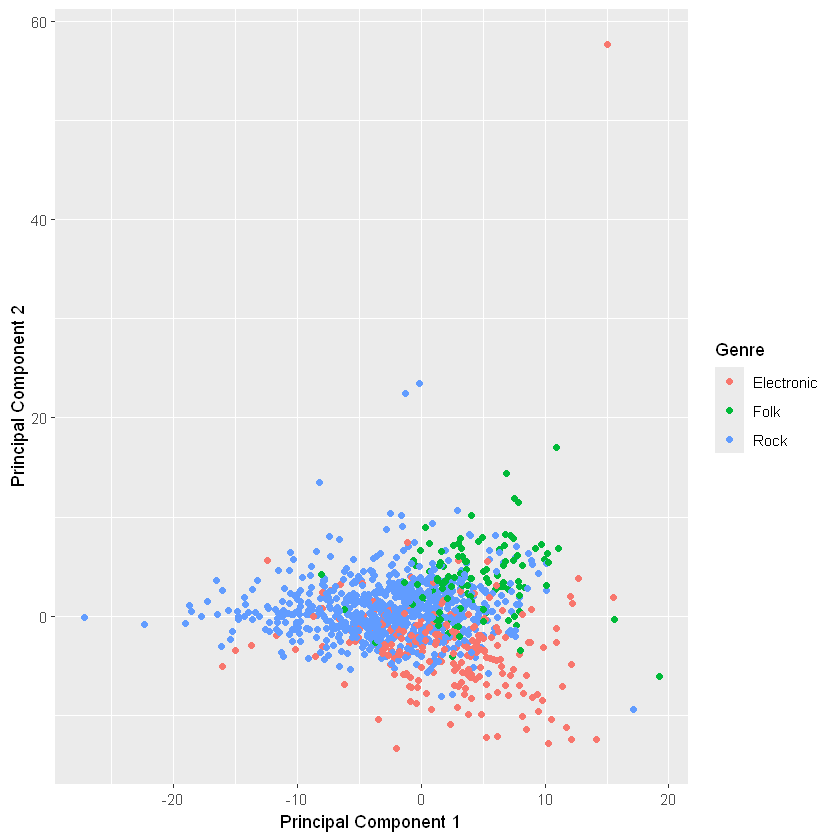

In [4]:
proj <- as.data.frame(pca$x)

# Add genre information to projection
proj$track_id <- complete_data$track_id
proj <- left_join(proj, echonest_with_genres %>% select(track_id, genre_parent), by = "track_id")

# Rename genre column for consistency
colnames(proj)[colnames(proj) == "genre_parent"] <- "genre"

# Plot the full dataset
ggplot(proj) +
  geom_point(aes(x = PC1, y = PC2, color = genre)) +
  labs(x = "Principal Component 1",
       y = "Principal Component 2", color = "Genre")

# Let's compare a few genres in PC1 and PC2
proj2 <- proj %>% filter(genre %in% c("Rock", "Electronic", "Folk"))

ggplot(proj2) +
  geom_point(aes(x = PC1, y = PC2, color = genre)) +
  labs(x = "Principal Component 1",
       y = "Principal Component 2", color = "Genre")